Synthetic_Health_Lifestyle

In [13]:
import jinja2 as jj
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.io.formats.style_render import jinja2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\bhata\Desktop\ML Projects\synthetic_health_lifestyle_ML\synthetic_health_lifestyle_dataset.csv")
df.info()
print(df.shape)
print(df.sample())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7500 non-null   int64  
 1   Age                  7500 non-null   int64  
 2   Gender               7500 non-null   object 
 3   Height_cm            7500 non-null   float64
 4   Weight_kg            7500 non-null   float64
 5   BMI                  7500 non-null   float64
 6   Smoker               7500 non-null   object 
 7   Exercise_Freq        5621 non-null   object 
 8   Diet_Quality         7500 non-null   object 
 9   Alcohol_Consumption  5608 non-null   object 
 10  Chronic_Disease      7500 non-null   object 
 11  Stress_Level         7500 non-null   int64  
 12  Sleep_Hours          7500 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 761.8+ KB
(7500, 13)
        ID  Age  Gender  Height_cm  Weight_kg   BMI Smoker Exercise_

Data Cleaning & Handling

In [4]:
print(df.head())
df["Exercise_Freq"] = df["Exercise_Freq"].fillna(df["Exercise_Freq"].mode()[0])
df["Alcohol_Consumption"] = df["Alcohol_Consumption"].fillna(df["Alcohol_Consumption"].mode()[0])
exercise_map = {
    "Daily":2,
    "1-2 times/week ":1,
    "3-5 times/week ":0
}
df["Exercise_Freq"]= df["Exercise_Freq"].map(exercise_map)
df.drop(columns=["ID"], inplace=True)
print(df.isna().sum())
print(df.duplicated().sum())

   ID  Age  Gender  Height_cm  Weight_kg   BMI Smoker   Exercise_Freq  \
0   1   56   Other      177.6       37.3  11.8    Yes             NaN   
1   2   69   Other      169.3       70.7  24.7     No  1-2 times/week   
2   3   46  Female      159.1       69.0  27.3     No           Daily   
3   4   32    Male      170.6       76.4  26.3     No  3-5 times/week   
4   5   60    Male      158.4       60.4  24.1     No  3-5 times/week   

  Diet_Quality Alcohol_Consumption Chronic_Disease  Stress_Level  Sleep_Hours  
0         Poor                 NaN              No             9          8.5  
1         Good                High              No             2          5.9  
2    Excellent            Moderate              No             3          4.8  
3    Excellent            Moderate              No             9          6.6  
4    Excellent                 Low             Yes             6          6.1  
Age                       0
Gender                    0
Height_cm                

Average BMI Classification By Gender

   Gender        BMI
0  Female  26.040837
1    Male  26.099020
2   Other  25.954326


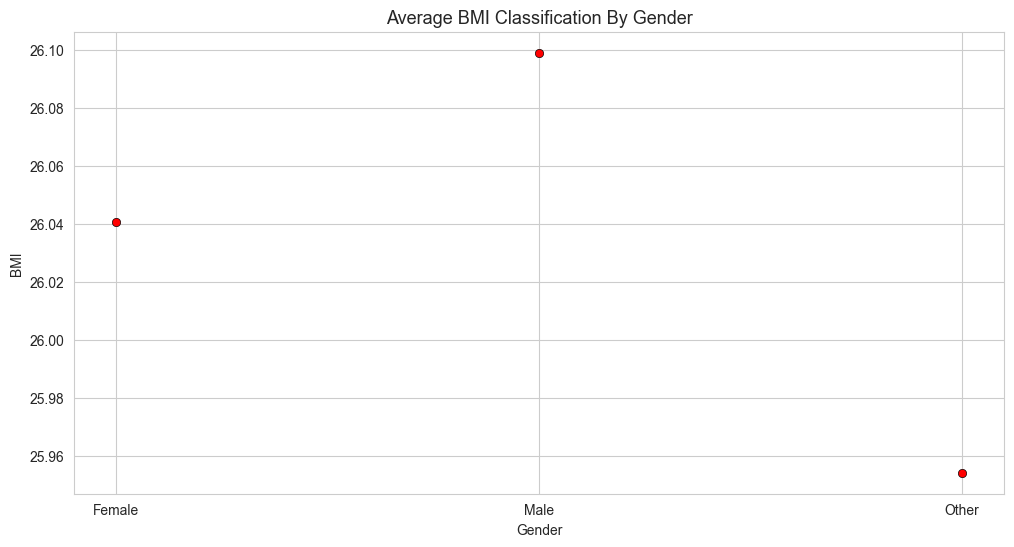

In [5]:
classfi_bmi = df.groupby ("Gender")["BMI"].mean().reset_index()
print(classfi_bmi)

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.scatterplot(data=classfi_bmi, x= "Gender",y="BMI",color = "red",edgecolor="black")
plt.title("Average BMI Classification By Gender",size = 13)
plt.show()

Smoker & Non-sMOLER Classification Based on Gender

   Gender Smoker  Count
0  Female     No   1765
1  Female    Yes    745
2    Male     No   1783
3    Male    Yes    768
4   Other     No   1715
5   Other    Yes    724


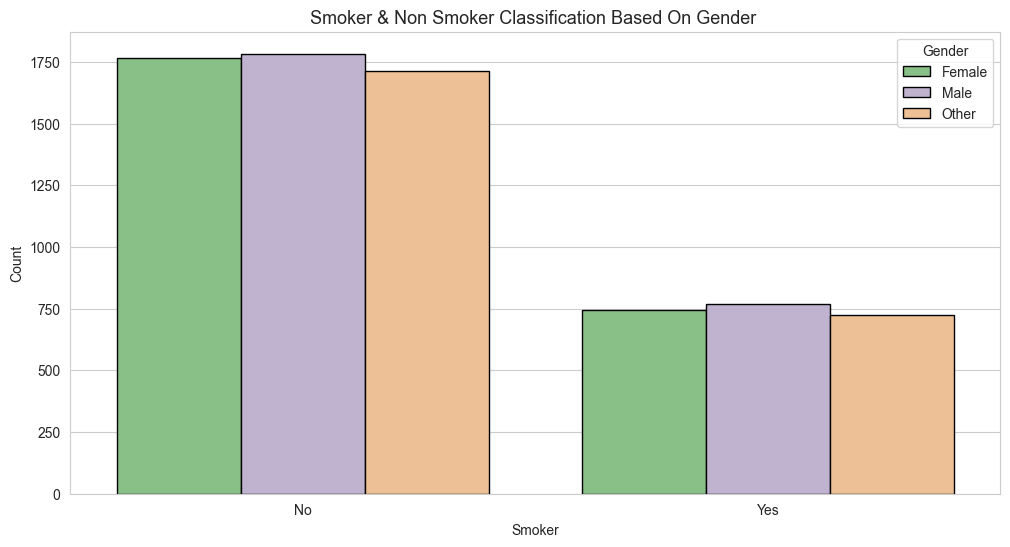

In [6]:
classifi_sm=df.groupby(["Gender","Smoker"]).size().reset_index(name="Count")
classifi_sm.style.background_gradient(cmap="Reds")
print(classifi_sm)

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.barplot(data=classifi_sm,x="Smoker",y="Count",hue="Gender",palette="Accent",edgecolor="black")
plt.title("Smoker & Non Smoker Classification Based On Gender ",size=13)
plt.show()

Diet Quality & Alcohol Consumption By Gender & Age

      Gender  Age Diet_Quality Alcohol_Consumption  Count
0     Female   18      Average                High      1
1     Female   18      Average                 Low      1
2     Female   18      Average            Moderate      1
3     Female   18    Excellent                High      2
4     Female   18    Excellent                 Low      5
...      ...  ...          ...                 ...    ...
1805   Other   69         Good                 Low      5
1806   Other   69         Good            Moderate      3
1807   Other   69         Poor                High      3
1808   Other   69         Poor                 Low      6
1809   Other   69         Poor            Moderate      6

[1810 rows x 5 columns]


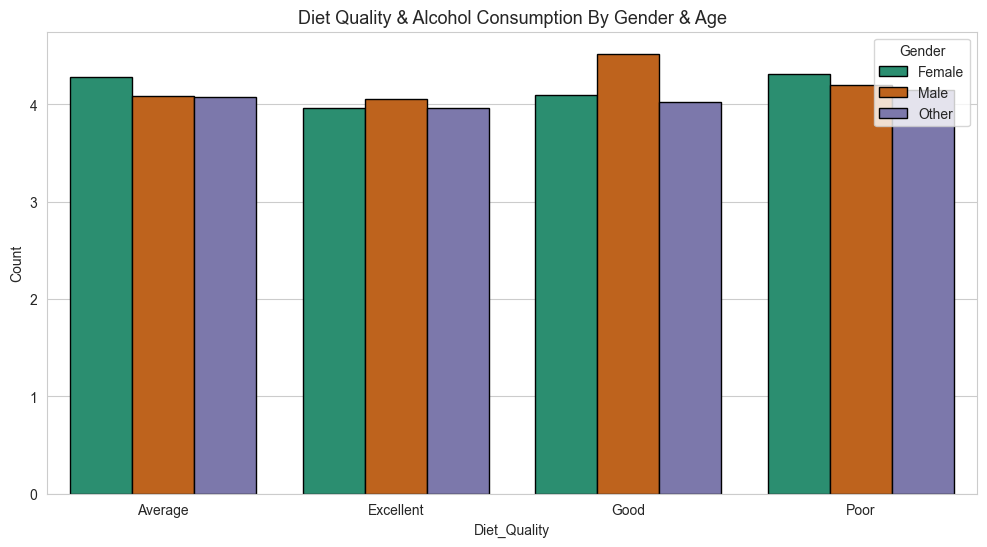

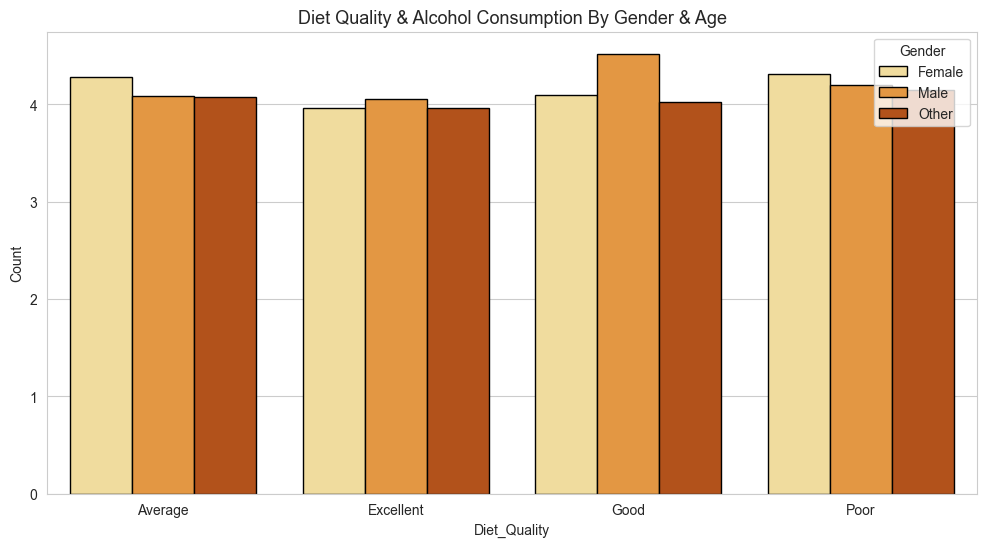

In [7]:
classifi_di = df.groupby(["Gender","Age","Diet_Quality","Alcohol_Consumption"]).size().reset_index(name="Count")
print(classifi_di)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(data= classifi_di,x="Diet_Quality",y="Count",hue= "Gender",ci=None,palette="Dark2",edgecolor="black")
plt.title("Diet Quality & Alcohol Consumption By Gender & Age",size=13)
plt.show()

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_di,x ="Diet_Quality",y="Count",hue="Gender",ci=None,palette="YlOrBr",edgecolor="black")
plt.title("Diet Quality & Alcohol Consumption By Gender & Age",size=13)
plt.show()

Average Sleep By Gender

   Gender  Sleep_Hours
0  Female     7.023825
1    Male     7.008114
2   Other     6.976015


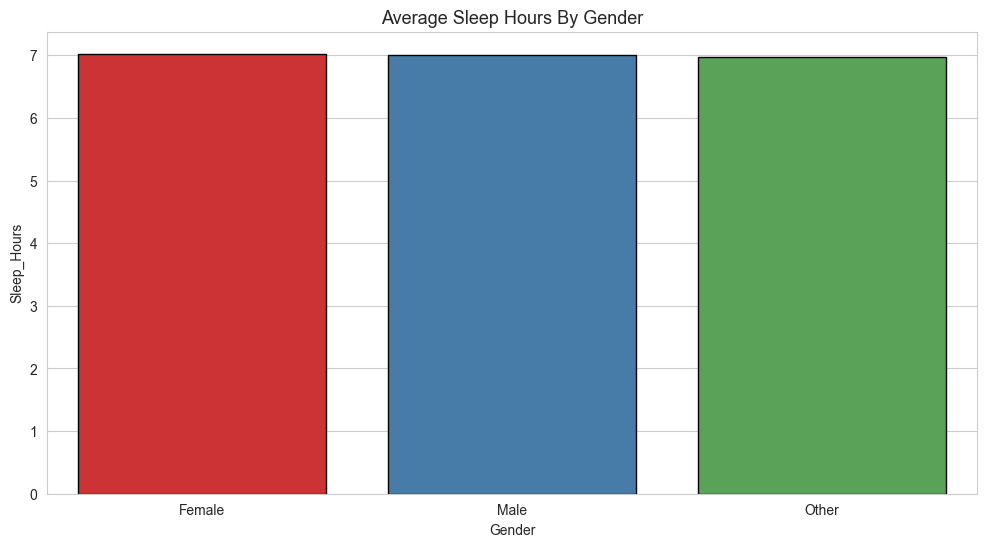

In [8]:
classifi_sl= df.groupby("Gender")["Sleep_Hours"].mean().reset_index()
classifi_sl.style.background_gradient(cmap="Purples")
print(classifi_sl)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_sl,x= "Gender",y="Sleep_Hours",edgecolor="black",palette="Set1")
plt.title("Average Sleep Hours By Gender",size=13)
plt.show()


Label Encoding Categorical Features using LabelEncode

In [9]:
print(df.head())
le = LabelEncoder()
cols= df[["Gender","Diet_Quality","Alcohol_Consumption","Chronic_Disease","Smoker","Exercise_Freq"]]
for col in cols:
    df[col]=le.fit_transform(df[col])
print(df.head())

   Age  Gender  Height_cm  Weight_kg   BMI Smoker  Exercise_Freq Diet_Quality  \
0   56   Other      177.6       37.3  11.8    Yes            2.0         Poor   
1   69   Other      169.3       70.7  24.7     No            NaN         Good   
2   46  Female      159.1       69.0  27.3     No            2.0    Excellent   
3   32    Male      170.6       76.4  26.3     No            NaN    Excellent   
4   60    Male      158.4       60.4  24.1     No            NaN    Excellent   

  Alcohol_Consumption Chronic_Disease  Stress_Level  Sleep_Hours  
0                 Low              No             9          8.5  
1                High              No             2          5.9  
2            Moderate              No             3          4.8  
3            Moderate              No             9          6.6  
4                 Low             Yes             6          6.1  
   Age  Gender  Height_cm  Weight_kg   BMI  Smoker  Exercise_Freq  \
0   56       2      177.6       37.3  11.8

Train-Test Split and Feature Scaling 


In [10]:
x= df.drop(columns="Chronic_Disease")
y = df["Chronic_Disease"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


Logistic Regression Model

In [11]:
model=LogisticRegression(class_weight="balanced")
model.fit(x_train_scaled,y_train)

y_pred= model.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy 0.7993333333333333
Confusion Matrix:
 [[1199    0]
 [ 301    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1199
           1       0.00      0.00      0.00       301

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.44      1500
weighted avg       0.64      0.80      0.71      1500



Random Forest Classfier Model

In [12]:
modelr= RandomForestClassifier(n_estimators=100,max_depth=None,random_state=42,class_weight= "balanced")
modelr.fit(x_train_scaled,y_train)

print(df["Chronic_Disease"].value_counts())

y_pred=modelr.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Chronic_Disease
0    6052
1    1448
Name: count, dtype: int64
Accuracy: 0.7993333333333333
Confusion Matrix:
 [[1199    0]
 [ 301    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1199
           1       0.00      0.00      0.00       301

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.44      1500
weighted avg       0.64      0.80      0.71      1500



 XG Boost Model

Accuracy: 0.6413333333333333
Confusion Matrix:
 [[874 325]
 [213  88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76      1199
           1       0.21      0.29      0.25       301

    accuracy                           0.64      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.69      0.64      0.66      1500



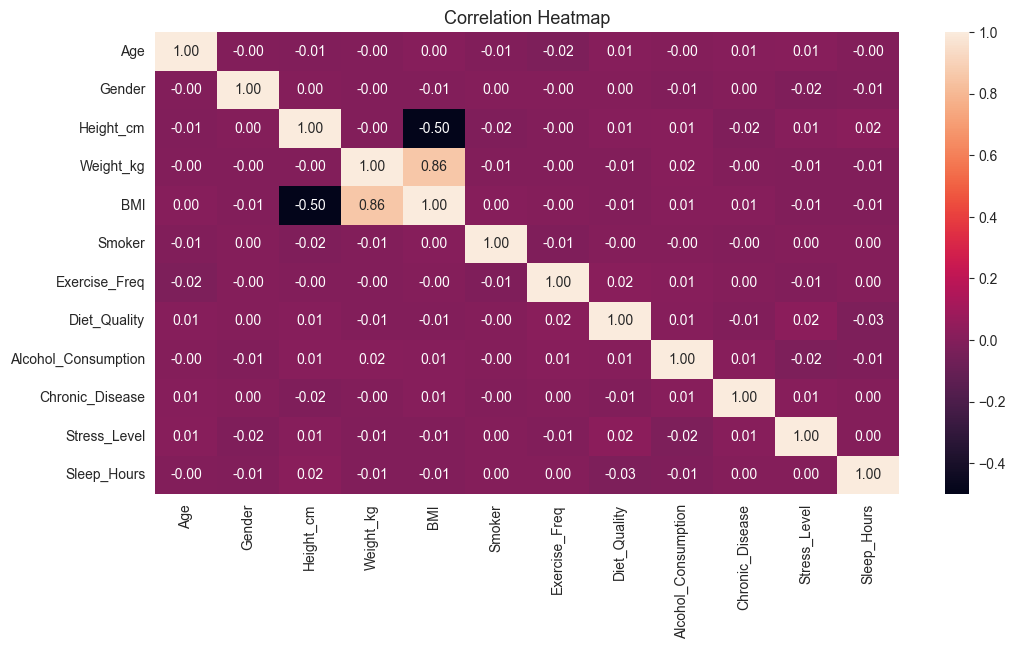

In [14]:
modelx = XGBClassifier(use_label_encoder = False,eval_metric='logloss',scale_pos_weight=4.0,random_state=42)
modelx.fit(x_train_scaled,y_train)

y_proba = modelx.predict_proba(x_test_scaled)[:,1]
y_proba = (y_proba>= 0.4).astype(int)
print("Accuracy:", accuracy_score(y_test,y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_proba))

cor=df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.title("Correlation Heatmap",size=13)
plt.show()
